In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import PercentFormatter
import seaborn as sns
from string import ascii_letters
from scipy.stats import pearsonr

In [3]:
a=pd.read_csv("/content/drive/MyDrive/cars_data.csv");

In [5]:
a.dtypes

id                     int64
symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors           int64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
a.columns
b=['id', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [ ]:
n = a.nunique(axis=0) 
n

id                   13
symboling             4
normalized-losses     5
make                  3
fuel-type             1
aspiration            2
num-of-doors          2
body-style            4
drive-wheels          3
engine-location       1
wheel-base            7
length                7
width                 8
height                7
curb-weight          11
engine-type           3
num-of-cylinders      3
engine-size           7
fuel-system           1
bore                  6
stroke                5
compression-ratio     7
horsepower            9
peak-rpm              4
city-mpg              7
highway-mpg           8
price                12
dtype: int64

In [ ]:
colors = list(np.random.choice(range(256), size=3))

Text(0, 0.5, 'Frequency')

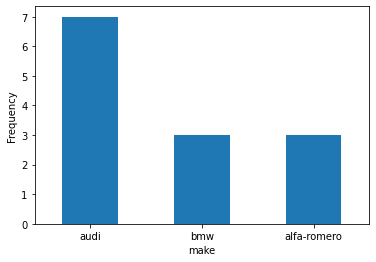

In [ ]:
#frequency count
c=a['make'].value_counts()
c.plot.bar(x='make', y='Count', rot=0)
plt.xlabel("make")
plt.ylabel("Frequency")

In [ ]:
max=a.max()
min=a.min()

Pareto Analysis

In [ ]:
b=a
b = b.sort_values(by='price',ascending=True)

In [ ]:

b["cumpercentage"]= 100 *b.price.cumsum() / b.price.sum()

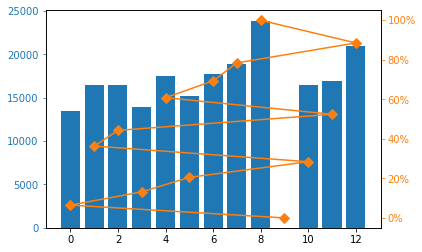

In [ ]:

fig, ax = plt.subplots()
ax.bar(b.index, b["price"], color="C0")
ax2 = ax.twinx()
ax2.plot(b.index, b["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff50cadac50>]],
      dtype=object)

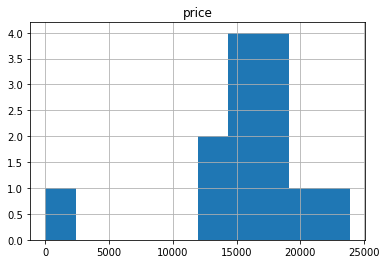

In [4]:
a.hist(column='price')

Correlation Heat-map between all numeric columns

In [ ]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = a.corr()

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

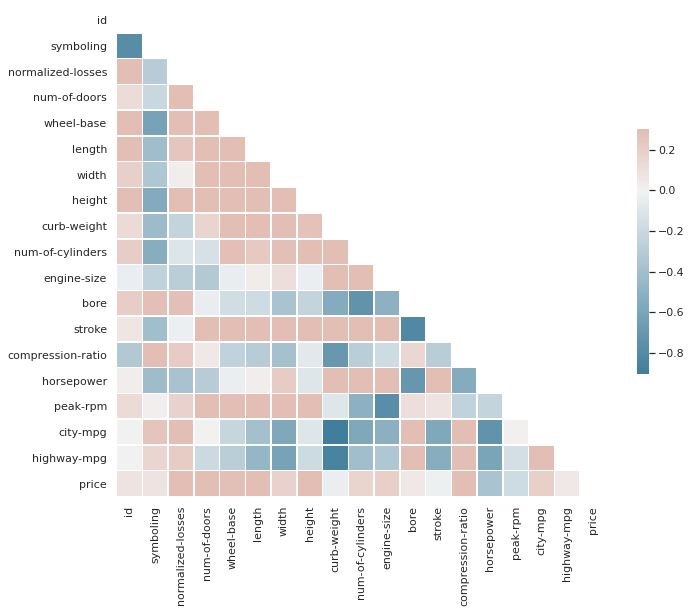

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Pearson Correlation and Trend between two numeric columns

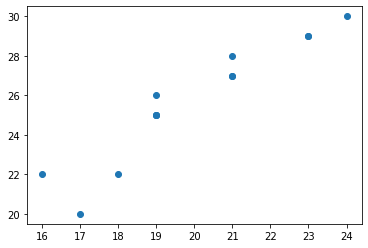

In [6]:
plt.scatter(a['city-mpg'], a['highway-mpg'])
plt.show()

In [ ]:
corr, _ = pearsonr(a['city-mpg'], a['highway-mpg'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.945


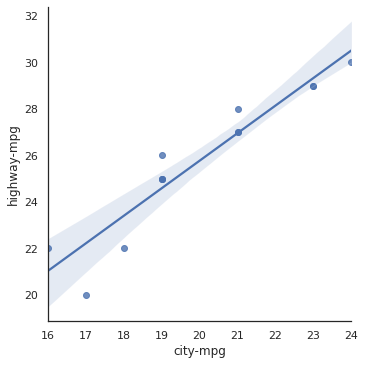

In [ ]:
sns.lmplot(x='city-mpg', y='highway-mpg', data=a)

**Cramer-V correlation between all Categorical columns**

**Correlation between two specific categorical columns**

**Cluster size Analysis**

**Clustering or Segmentation**

No handles with labels found to put in legend.


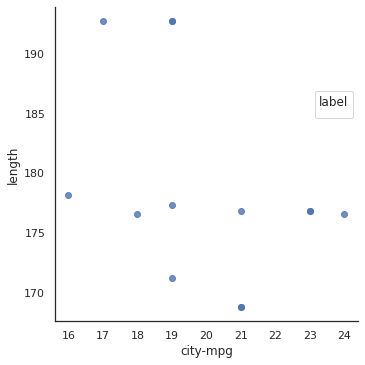

In [ ]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=a, x='city-mpg', y='length', 
                   fit_reg=False, legend=True, legend_out=True)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])